# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

This dataset represented is related to 17 campaigns which were conducted between May 2008 and November 2010. It recorded 79354 contacts with 8% success rate. These contacts were offered an attractive long-term deposit with good interest rates. For each contact, many attributed were recorded with target feature as success.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [38]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree, export_graphviz
# import graphviz

from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv('../data/bank-additional-full.csv', sep = ';')

In [40]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [42]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [43]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [44]:
df.isnull().sum()
#No missing/na values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [45]:
df.duplicated().sum()
#12 duplicate entries

12

In [46]:
#Drop duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()


0

In [47]:
df[['default','housing','loan']].value_counts()

default  housing  loan   
no       yes      no         14238
         no       no         12600
unknown  yes      no          3641
         no       no          3456
no       yes      yes         2968
         no       yes         2008
         unknown  unknown      763
unknown  yes      yes          723
         no       yes          549
         unknown  unknown      227
yes      no       no             2
         yes      no             1
Name: count, dtype: int64

**Following are the observations:**
- The dataset doesn't have any missing values.
- There are 10 Categorical and 10 numerical features.
- 3 binary features, 'default', 'housing' , 'loan' also contains "unkown" values. Potential other features too, which will need to be handled.
- Special consideration of 'duration' as it has been highlighted in the description of the attributes. We may drop the column as it is not providing menaingful impact on descision making, its only recorded after descision has been made.

### Exploring the data and distribution - Perform EDA

In [48]:
#Identify numerical columns i.e. non-object features like int, float 
num_cols = df.select_dtypes(exclude = ['object']).columns.tolist()
print(num_cols)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


* Data visualization by plotting distribution of numeric features using histograms and boxplots.
* For categorical features, use bar plots to visualize the frequency of each category.

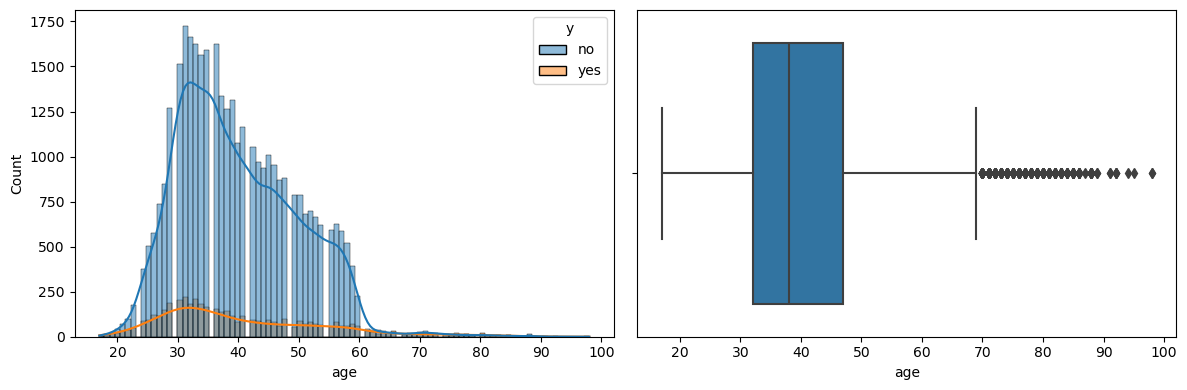

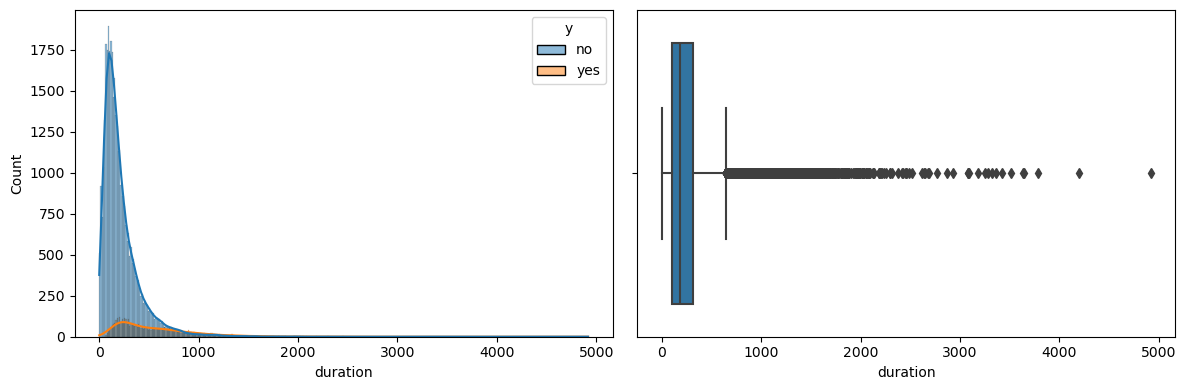

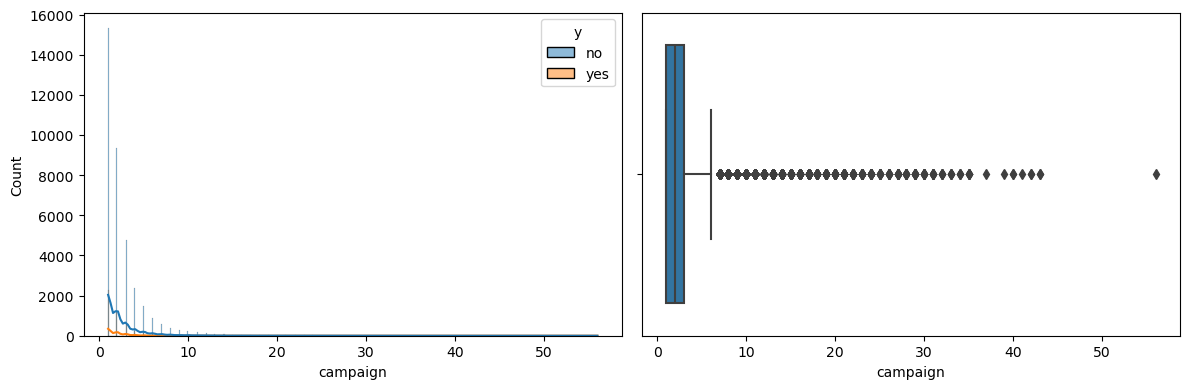

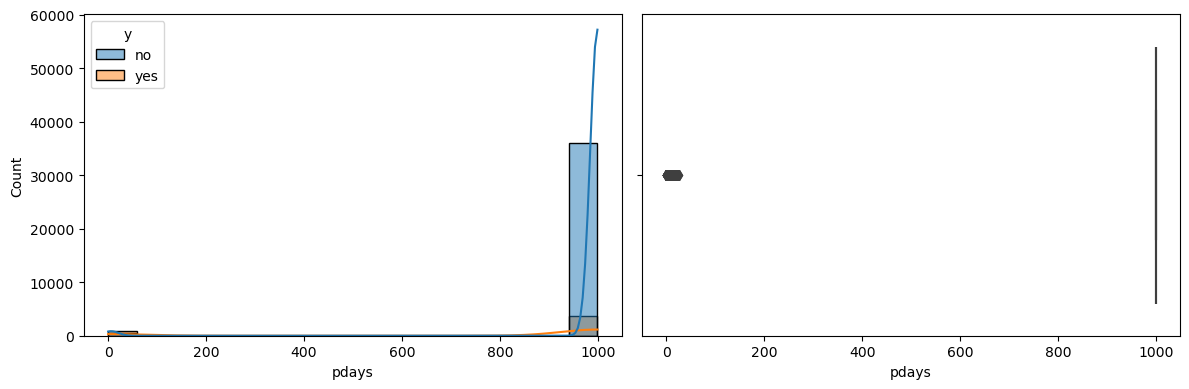

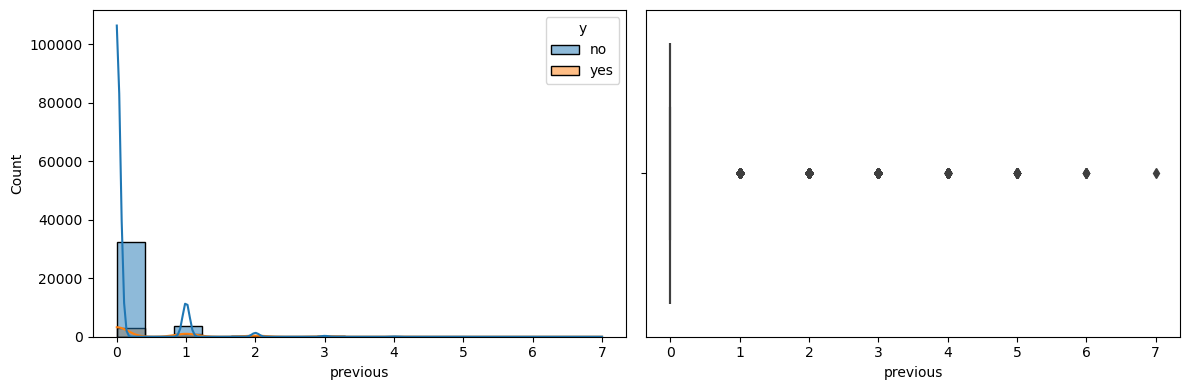

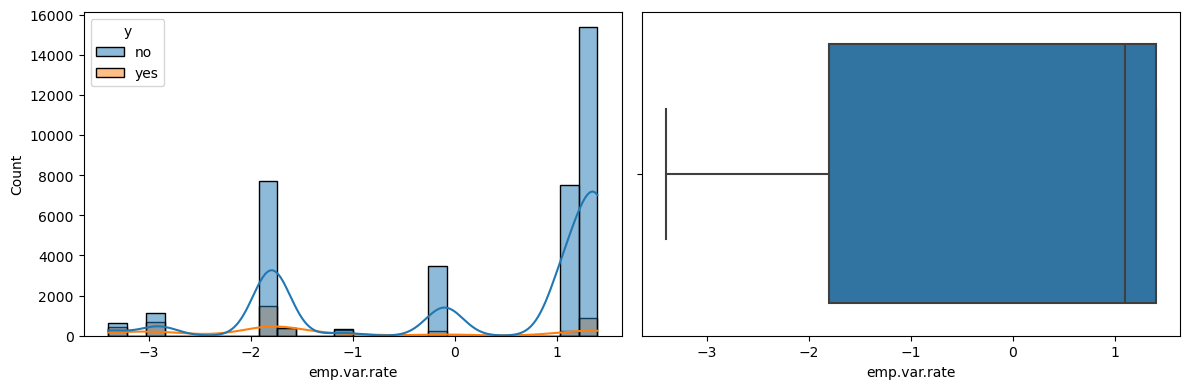

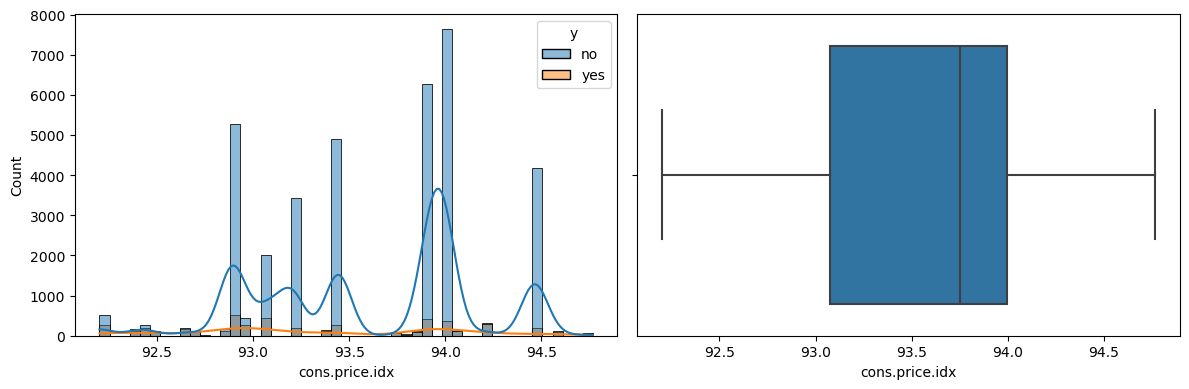

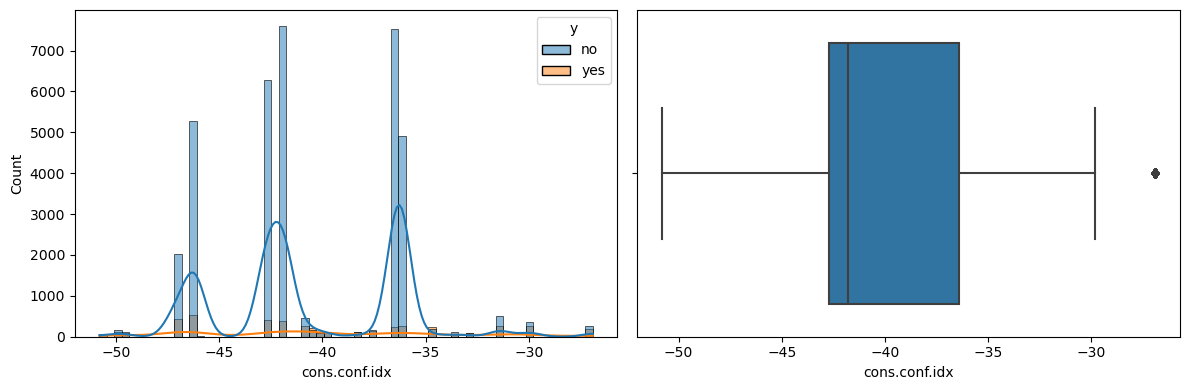

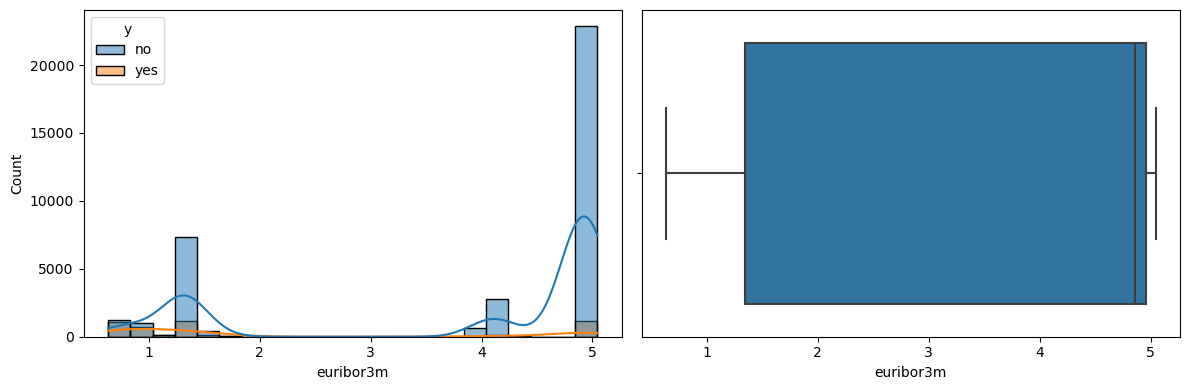

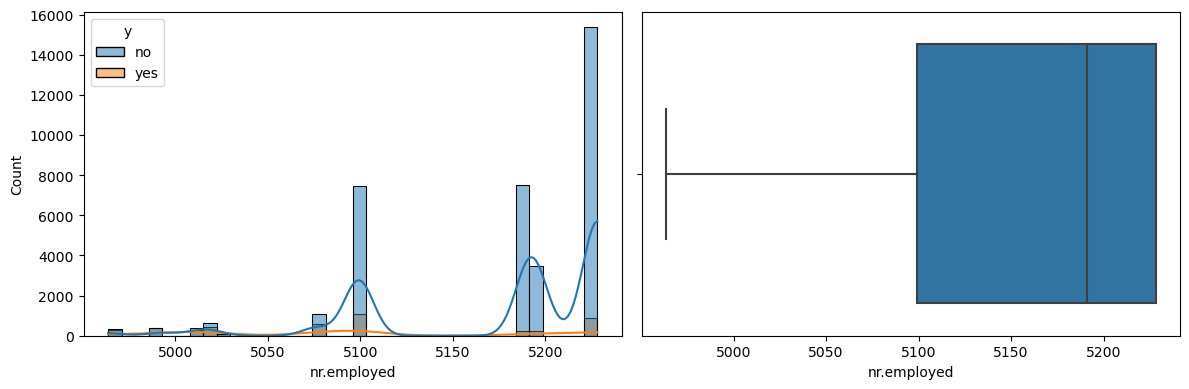

In [49]:
#Use the numerical columns to plot all the box-plots and histograms with hue on if it was success or not
for name in num_cols:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data=df,x=name,kde=True,hue='y')
    # plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df,x=name)
    plt.tight_layout()

We can see from the historgrams that many numerical feaures are skewed. Payday and previous columns are heavily skewed any may not provide any meaningfull impact, they can be dropped.

Correlation Analysis 
- Visualize and analyse the correlation matrix for numeric features.
- Explore relationships between all the features with respect to target feature.


Text(0.5, 1.0, 'Correlation Matrix ')

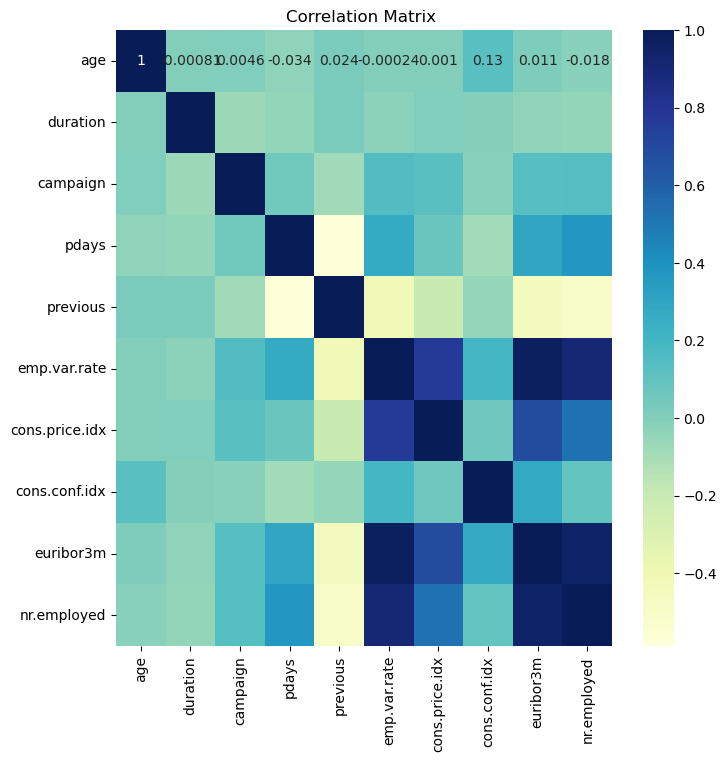

In [50]:
#Corelation metrics for all the numerical columns
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix ')

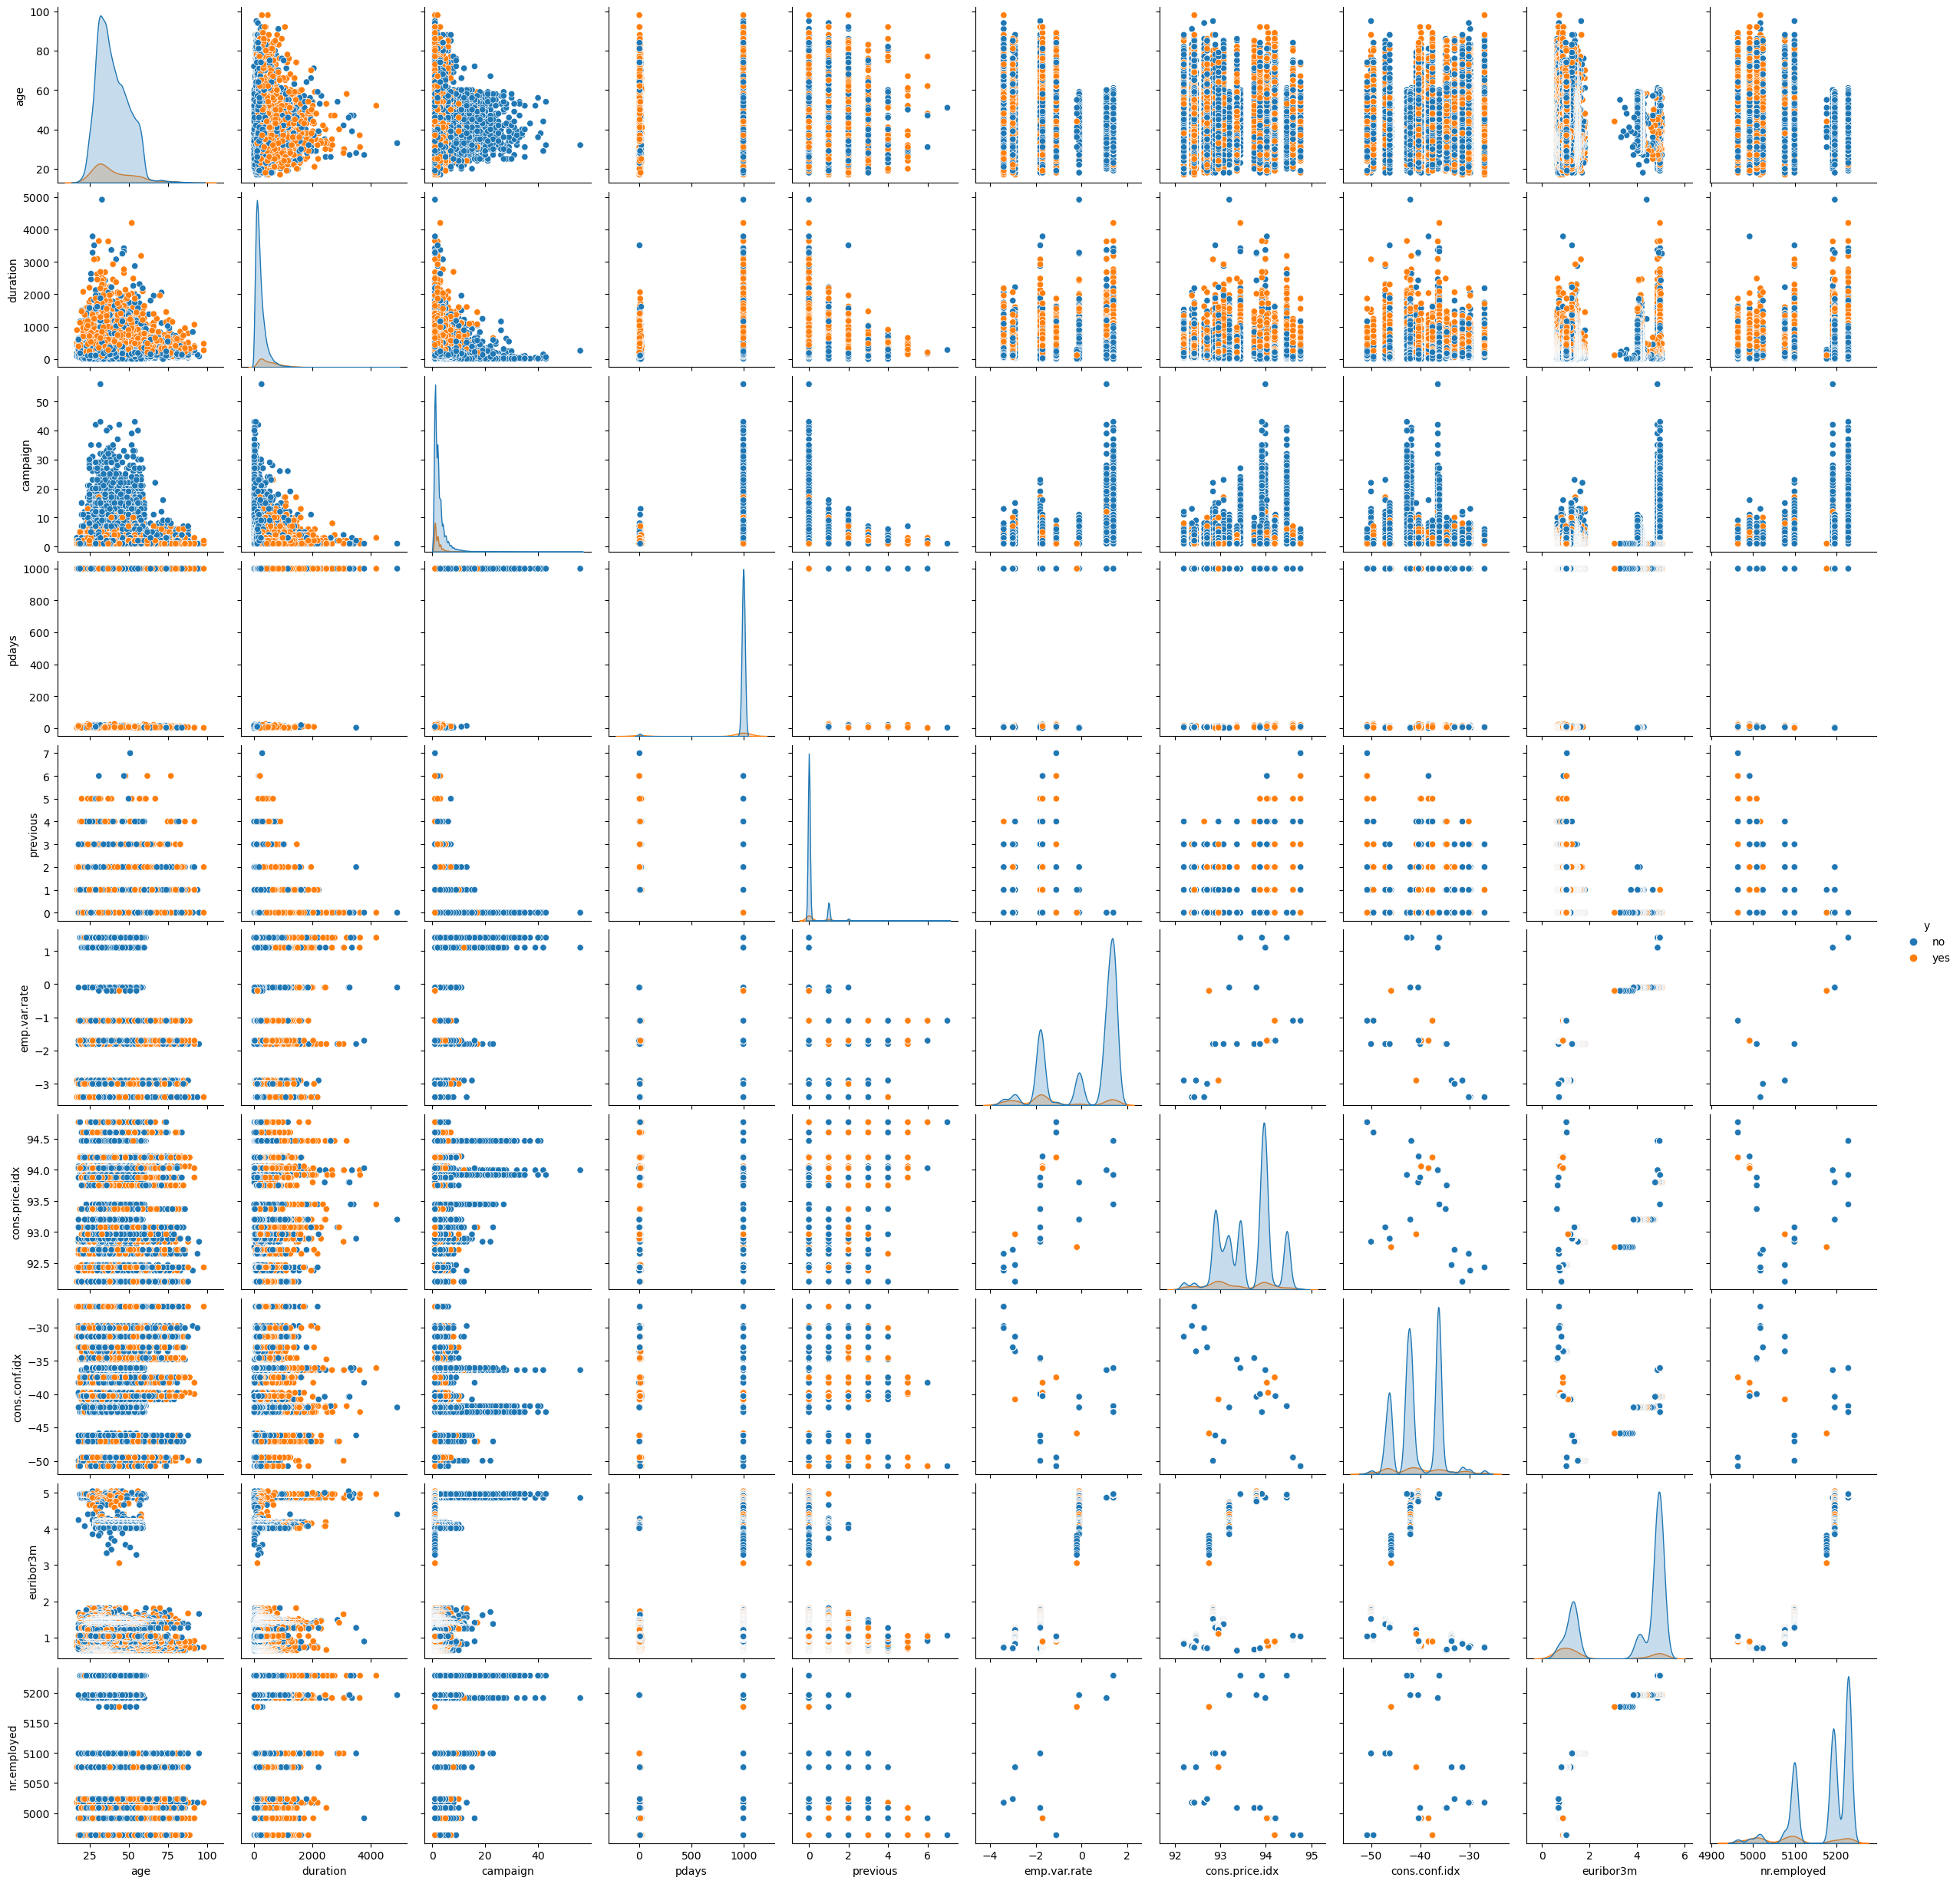

In [51]:
sns.pairplot(df, hue='y')
plt.show()

In [52]:
#All categorical columns i.e. features of type object
categorical_cols = df.select_dtypes(include = ['object']).columns.tolist()
print(categorical_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


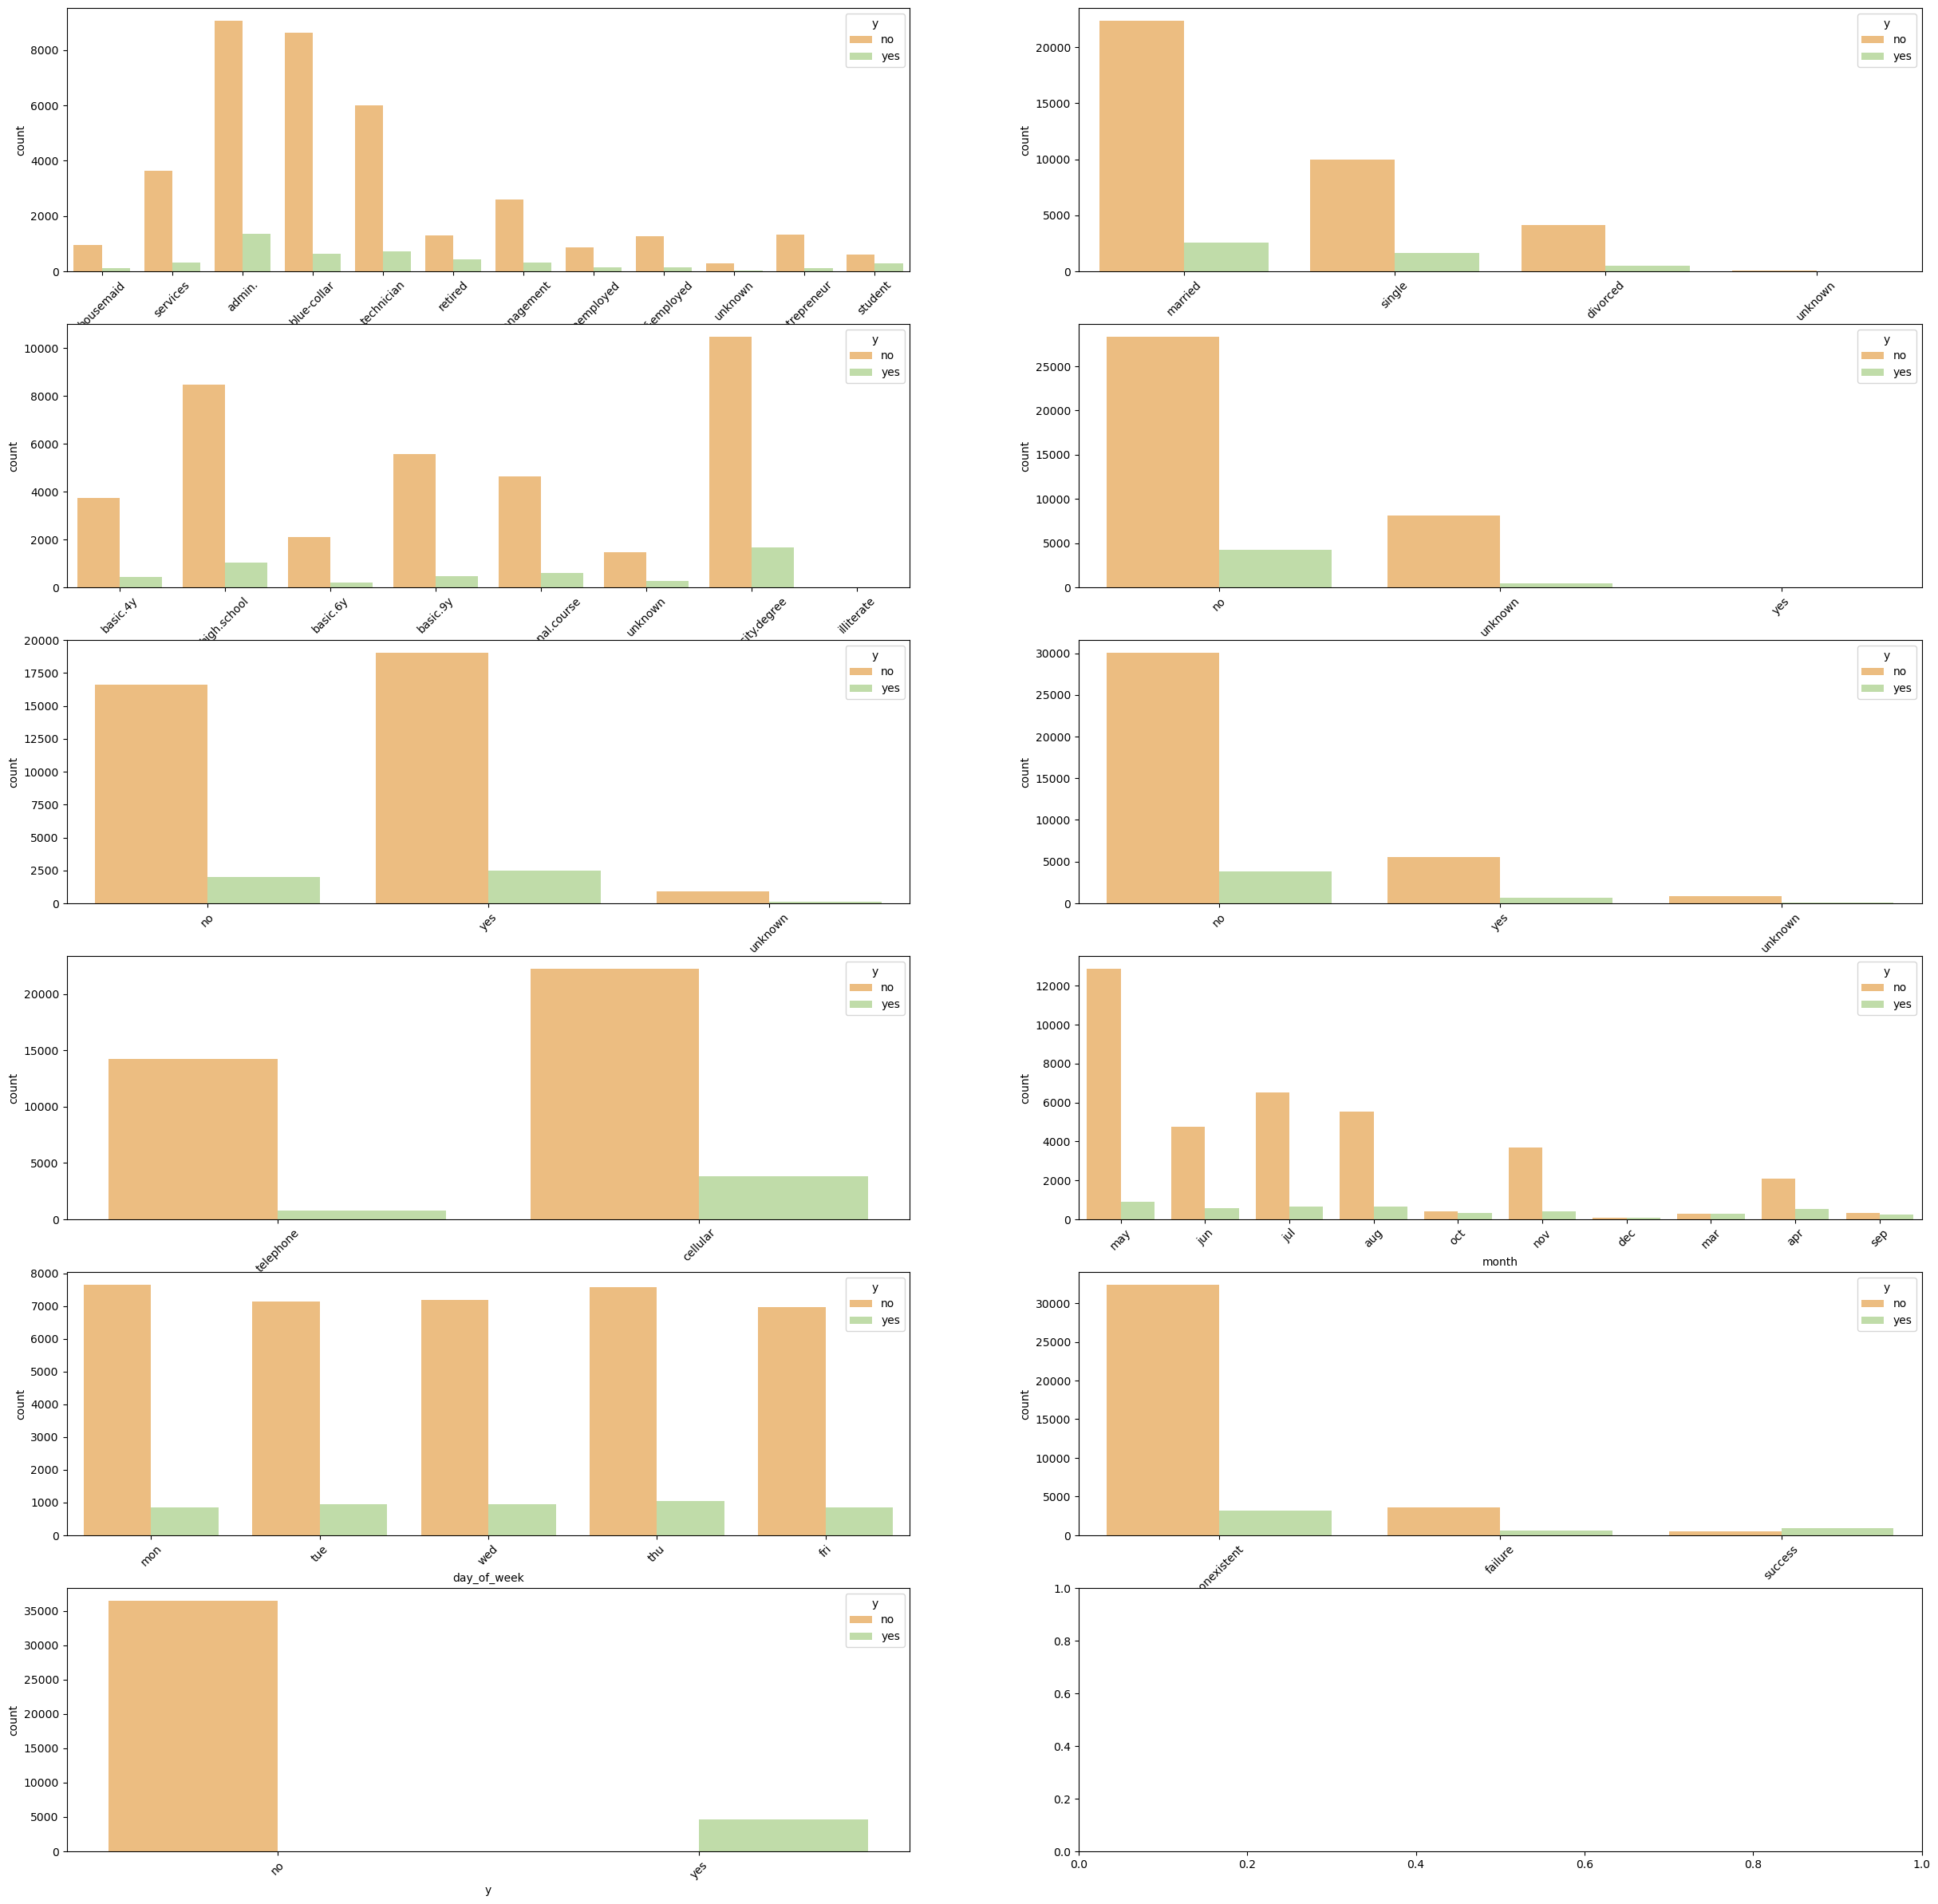

In [53]:
fig, axs = plt.subplots(nrows = 6, ncols=2, figsize = (30,30))
for col,ax in zip(categorical_cols,axs.flatten()):
    sns.countplot(data=df, x=col, hue='y',ax=ax, palette='Spectral').set_xticklabels(ax.get_xticklabels(), rotation=45)

Some observation on categorical columns :
- Distribution for 'day_of_week' feature is uniform.
- 'contact' people with celluar connection said yes more but were also more such customers exist.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

#### Businness Objective
The bussiness objective behind this excercise is to help Portuguese banking institution with their marketing efforts. This is aimed to be done by providing the accurate prediction if a customer will sbscribe to a offered term deposite or not. This will be done based on varoius idicators recorded during the campaign.


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [55]:
categorical_features = df.select_dtypes(include = ['object']).drop('y',axis=1).columns.tolist()
numerical_features = df.select_dtypes(exclude = ['object']).columns.tolist()

print("Categorical columns and size : ",len(categorical_features), categorical_features)
print("Numerical columns and size : ",len(numerical_features), numerical_features)

Categorical columns and size :  10 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Numerical columns and size :  10 ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [56]:
# Preprocessor for logistic, KNN, SVM apply standard scale on numerical features and ordinal encoder on categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OrdinalEncoder(), categorical_features)
    ])
ordinal_encoder = OrdinalEncoder()

In [57]:
#Label Encode y to obtain a Boolean
df_features = df.drop('y',axis=1)
df_target = pd.DataFrame(df['y'])
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_target['y'] = le.fit_transform(df_target['y'])
df_target['y'].value_counts()

y
0    36537
1     4639
Name: count, dtype: int64

In [58]:
df_features_trnsf = preprocessor.fit_transform(df_features)
df_features_trnsf

array([[ 1.53314313,  0.01035157, -0.56596326, ...,  6.        ,
         1.        ,  1.        ],
       [ 1.62910732, -0.42157694, -0.56596326, ...,  6.        ,
         1.        ,  1.        ],
       [-0.29017656, -0.12462609, -0.56596326, ...,  6.        ,
         1.        ,  1.        ],
       ...,
       [ 1.53314313, -0.26731675, -0.20498953, ...,  7.        ,
         0.        ,  1.        ],
       [ 0.3815728 ,  0.70837889, -0.56596326, ...,  7.        ,
         0.        ,  1.        ],
       [ 3.26049862, -0.07449153,  0.1559842 , ...,  7.        ,
         0.        ,  0.        ]])

In [59]:
df_features_trnsf_df = pd.DataFrame(df_features_trnsf, columns=[numerical_features+categorical_features])
df_features_trnsf_df.head(5)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,1.533143,0.010352,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0
1,1.629107,-0.421577,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,1.0
2,-0.290177,-0.124626,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,7.0,1.0,3.0,0.0,2.0,0.0,1.0,6.0,1.0,1.0
3,-0.002284,-0.413864,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0
4,1.533143,0.187751,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,7.0,1.0,3.0,0.0,0.0,2.0,1.0,6.0,1.0,1.0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [60]:
#Split the data 70/30
X = df_features_trnsf_df
y = df_target['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [61]:
X_train.shape, X_test.shape


((28823, 20), (12353, 20))

In [62]:
y_train.shape, y_test.shape


((28823,), (12353,))

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

**Using dummy classifier with uniform - Random Classifier**
- Randomly assigns a class to each test instance

Random Classifier Accuracy: 0.49
              precision    recall  f1-score   support

           0       0.89      0.49      0.63     10961
           1       0.11      0.50      0.18      1392

    accuracy                           0.49     12353
   macro avg       0.50      0.49      0.41     12353
weighted avg       0.80      0.49      0.58     12353



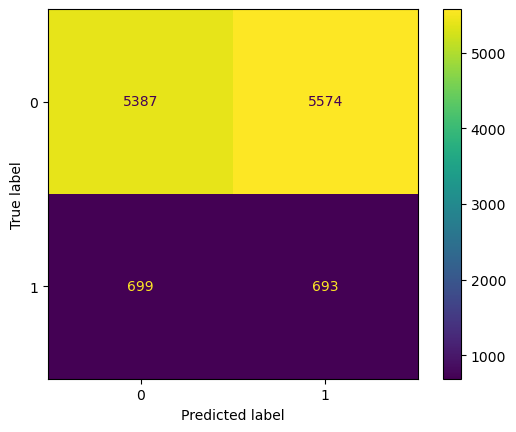

In [63]:
#Using dummy classifier with uniform
random_clf = DummyClassifier(strategy="uniform")
random_clf.fit(X_train, y_train)

# Make predictions
y_pred = random_clf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Random Classifier Accuracy:", round(accuracy,2))
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


**Using dummy classifier with most_frequent**
-	Serves as a baseline to compare more complex models.
-	Helps detect issues in dataset imbalance.
-	Provides an upper bound on trivial models

Most Frequent Classifier Accuracy: 0.89


              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10961
           1       0.00      0.00      0.00      1392

    accuracy                           0.89     12353
   macro avg       0.44      0.50      0.47     12353
weighted avg       0.79      0.89      0.83     12353



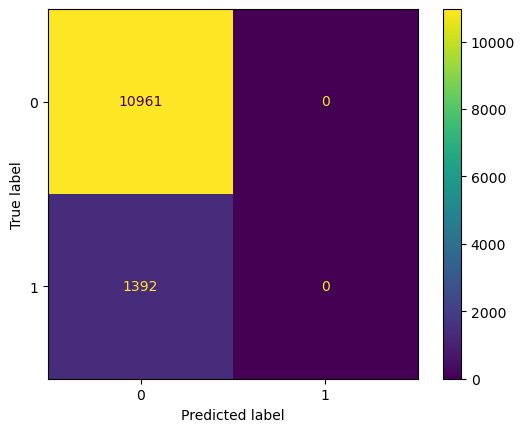

In [64]:
#Using dummy classifier with most_frequent
dummy_clf = DummyClassifier(strategy = 'most_frequent')
dummy_clf.fit(X_train, y_train)
y_pred_most_frequent = dummy_clf.predict(X_test)

# Evaluate performance
accuracy_most_frequent = accuracy_score(y_test, y_pred_most_frequent)
print("Most Frequent Classifier Accuracy:", round(accuracy_most_frequent,2))
print(classification_report(y_test, y_pred_most_frequent))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_most_frequent)


- Start with a simple baseline before using complex models.
- Choose a baseline based on dataset characteristics (balanced, imbalanced etc)

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [65]:
# Using simple logistic regression model
simple_log_reg = LogisticRegression()

# Fit the model on training data set
simple_log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = simple_log_reg.predict(X_test)
y_pred_log_reg

array([0, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10961
           1       0.65      0.41      0.50      1392

    accuracy                           0.91     12353
   macro avg       0.79      0.69      0.73     12353
weighted avg       0.90      0.91      0.90     12353



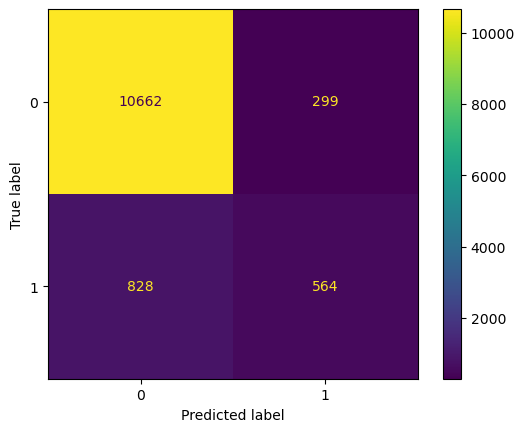

In [66]:
print(classification_report(y_test, y_pred_log_reg))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log_reg)


### Problem 9: Score the Model

What is the accuracy of your model?

In [67]:
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", round(accuracy_log_reg,2))

Logistic Regression Accuracy: 0.91


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [68]:
# Initialize all models which will be compared
all_models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True)
}

In [69]:
#Train and evalute all the models those were identified 
results = {}

for name, model in all_models.items():
    
    # record the start and end time to identify training time
    start_t = time.time()
    model.fit(X_train, y_train)
    end_t = time.time()
    fit_t = end_t - start_t
    #accuracy
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    y_pred_mod = model.predict(X_test)
    #scoring
    precision = precision_score(y_test, y_pred_mod)
    recall = recall_score(y_test, y_pred_mod)
    f1 = f1_score(y_test, y_pred_mod)

    y_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)

    #compile the result in an array
    results[name] = {
        'Model': name,
        'Train Time': fit_t,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'precision':precision,
        'recall': recall,
        'f1': f1,
        'AUC': auc,
        'y pred': y_pred_mod,
        'y_prob': y_prob
    }

    print(f"{name}: Train Time = {fit_t:.2f}, Train Accuracy = {train_accuracy:.2f}, Test Accuracy = {test_accuracy:.2f}, Precision = {precision:.2f}, Recall = {recall:.2f}, F1 = {f1:.2f}, AUC = {auc:.2f}")

Logistic Regression: Train Time = 0.24, Train Accuracy = 0.91, Test Accuracy = 0.91, Precision = 0.65, Recall = 0.41, F1 = 0.50, AUC = 0.93
Decision Tree: Train Time = 0.15, Train Accuracy = 1.00, Test Accuracy = 0.89, Precision = 0.52, Recall = 0.53, F1 = 0.53, AUC = 0.74
KNN: Train Time = 0.00, Train Accuracy = 0.93, Test Accuracy = 0.90, Precision = 0.59, Recall = 0.37, F1 = 0.45, AUC = 0.85
SVM: Train Time = 27.37, Train Accuracy = 0.91, Test Accuracy = 0.91, Precision = 0.68, Recall = 0.33, F1 = 0.44, AUC = 0.93


In [70]:
results_df = pd.DataFrame(results).transpose().reset_index(drop=True)
results_df

,Model,Train Time,Train Accuracy,Test Accuracy,precision,recall,f1,AUC,y pred,y_prob
0,Logistic Regression,0.240384,0.91139,0.908767,0.653534,0.405172,0.500222,0.931616,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0.0274925482354643, 0.01754806350561837, 0.00..."
1,Decision Tree,0.15495,1.0,0.892091,0.520673,0.533764,0.527137,0.735681,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
2,KNN,0.001821,0.925893,0.899539,0.585504,0.371408,0.454505,0.846908,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
3,SVM,27.369169,0.91087,0.907148,0.684766,0.326149,0.441849,0.933058,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0.04804746899425195, 0.041582091349895, 0.023..."


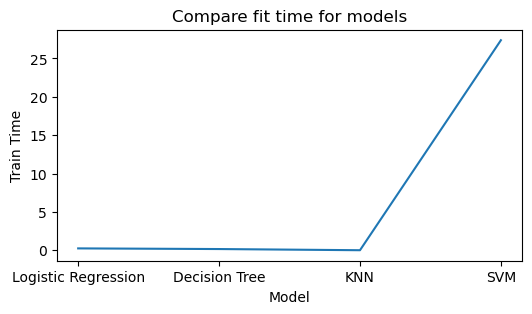

In [71]:
plt.figure(figsize=(6,3))
sns.lineplot(results_df, x='Model', y='Train Time').set(title='Compare fit time for models')
plt.show()

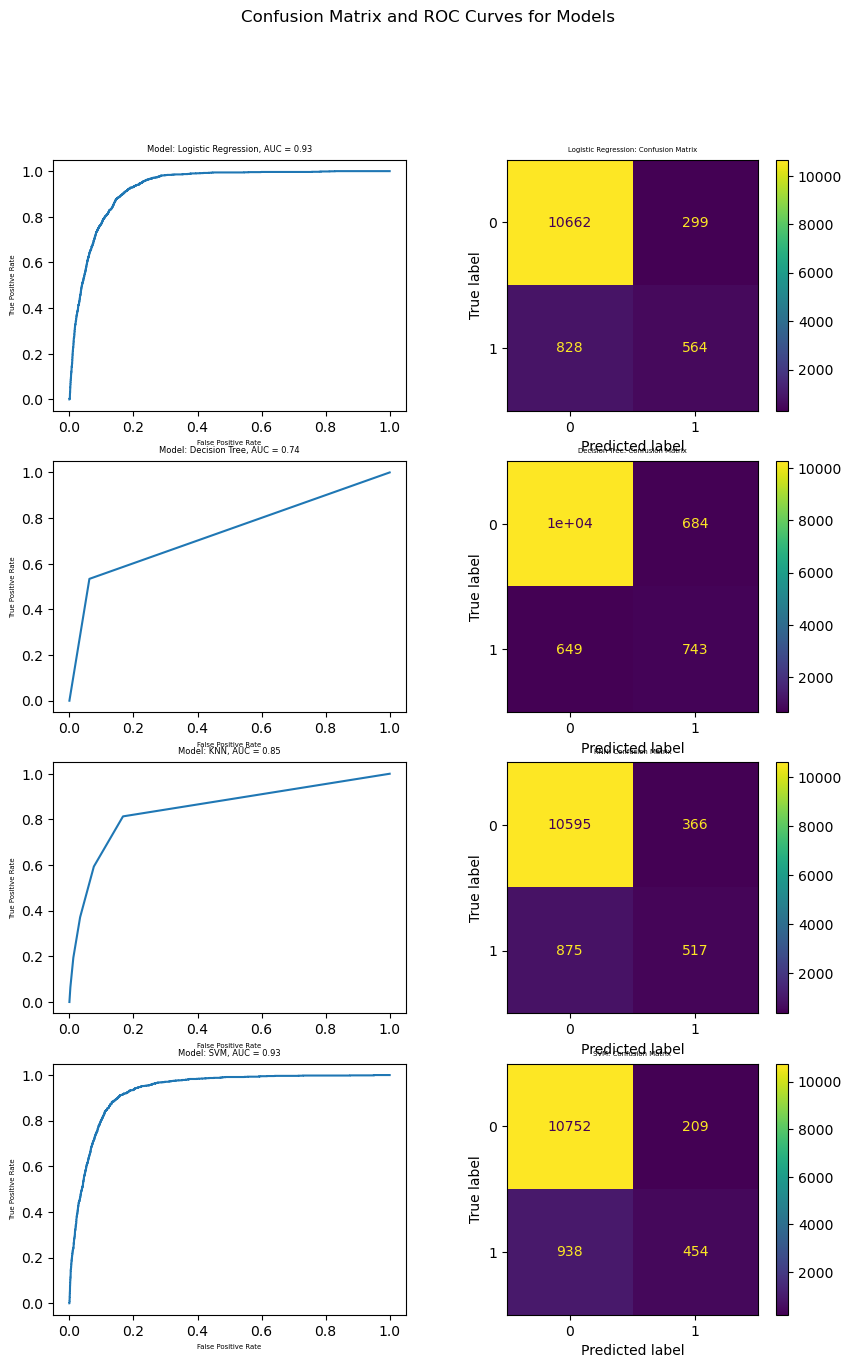

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

In [72]:
# Create a 4x2 grid of subplots
fig, axes = plt.subplots(4, 2, figsize=(10,15))
# Add a title for the entire figure
fig.suptitle('Confusion Matrix and ROC Curves for Models')  

plt_count = 0

for index, row in results_df.iterrows():
    plt.figure(figsize=(10,15))

    model = row['Model']
    y_prob = row['y_prob']
    ax = axes.flat[plt_count]
    
    # Visualizing ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    
    ax.plot(fpr, tpr)
    ax.set_xlabel('False Positive Rate',fontsize=5)
    ax.set_ylabel('True Positive Rate',fontsize=5)
    ax.set_title(f"Model: {model}, AUC = {round(row['AUC'],2)}",fontsize=6)
    
    plt_count += 1

    y_pred = row['y pred']
    ax = axes.flat[plt_count] 
    # Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)
    ax.set_title(f"{model}: Confusion Matrix",fontsize=5)
    plt_count += 1

plt.tight_layout()

plt.show()

### Problem 11: Improving the Model


Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

**LogisticRegression**
Perfom GridSearch on LogisticRegression with different value of parameters.

In [73]:
logreg_new = LogisticRegression()

logreg_params = {
    'C': [0.001, 0.01, 0.1, 1],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

logreg_grid = GridSearchCV(logreg_new, param_grid=logreg_params, cv=5, scoring='accuracy')

start_time = time.time()
logreg_grid.fit(X_train, y_train)
end_time = time.time()

In [74]:
logreg_execution_time = end_time - start_time

logreg_grid_best_params = logreg_grid.best_params_
logreg_grid_train_score = logreg_grid.score(X_train, y_train)
logreg_grid_test_score = logreg_grid.score(X_test, y_test)

print('logreg_grid_best_params: ', logreg_grid_best_params)
print('logreg_grid_train_score: ', round(logreg_grid_train_score,2))
print('logreg_grid_test_score: ', round(logreg_grid_test_score,2))
print('logreg_execution_time: ', round(logreg_execution_time,2), 's')

logreg_grid_best_params:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
logreg_grid_train_score:  0.91
logreg_grid_test_score:  0.91
logreg_execution_time:  21.49 s


In [75]:
y_pred_logreg = logreg_grid.best_estimator_.predict(X_test)

logreg_precision_score = precision_score(y_test, y_pred_logreg)
logreg_recall_score = recall_score(y_test, y_pred_logreg)
logreg_f1_score = f1_score(y_test, y_pred_logreg)

print('logreg_precision_score: ', round(logreg_precision_score,2))
print('logreg_recall_score: ', round(logreg_recall_score,2))
print('logreg_f1_score: ', round(logreg_f1_score,2))

print(classification_report(y_test, y_pred_logreg))

logreg_precision_score:  0.65
logreg_recall_score:  0.41
logreg_f1_score:  0.5
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10961
           1       0.65      0.41      0.50      1392

    accuracy                           0.91     12353
   macro avg       0.79      0.69      0.73     12353
weighted avg       0.90      0.91      0.90     12353



In [76]:
y_prob_logreg = logreg_grid.best_estimator_.predict_proba(X_test)[:, 1]
auc_logreg = roc_auc_score(y_test, y_prob_logreg)
print(f"AUC = {auc_logreg:.2f}")

AUC = 0.93


In [77]:
cols = numerical_features+categorical_features
print(cols)


['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [78]:
# Retrieve the coefficients
coeff = logreg_grid.best_estimator_.coef_[0]
intercept = logreg_grid.best_estimator_.intercept_[0]

# Create a DataFrame to display the coefficients along with their feature names
coeff_df = pd.DataFrame({
    'Feature': cols,
    'Coefficient': coeff
})
print("Intercept:", intercept)

Intercept: -3.0111191866483944


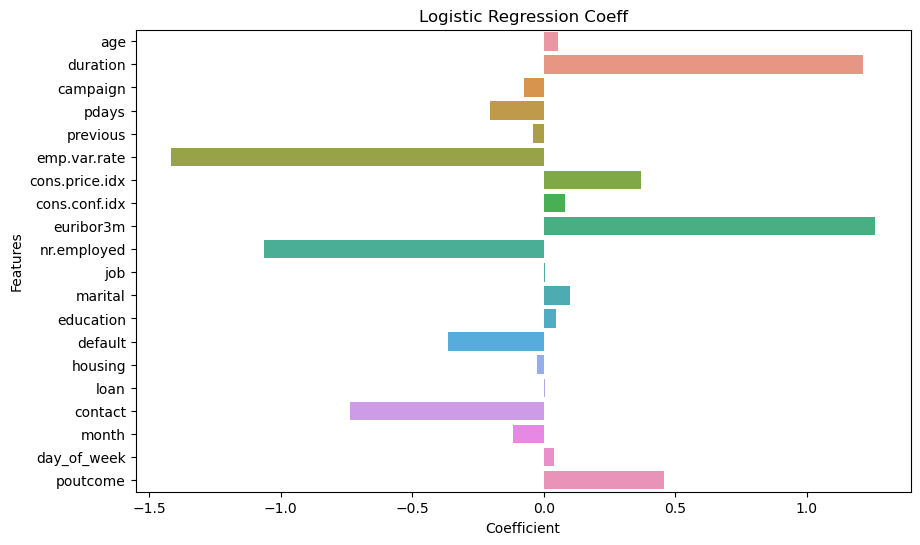

In [79]:
# Coefficients plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df)
plt.title('Logistic Regression Coeff')
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.show()

**KNN**
- Perform KNN analysis with differnet neighbors and weight values.

In [80]:
knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors': list(range(1, 22, 2)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
knn_grid = GridSearchCV(knn, param_grid=knn_params, cv=5, scoring='accuracy')

start_time = time.time()
knn_grid.fit(X_train, y_train)
end_time = time.time()

In [81]:
knn_execution_time = end_time - start_time
knn_grid_best_params = knn_grid.best_params_
knn_grid_train_score = knn_grid.score(X_train, y_train)
knn_grid_test_score = knn_grid.score(X_test, y_test)
print('knn_grid_best_params: ', knn_grid_best_params)
print('knn_grid_train_score: ', round(knn_grid_train_score,2))
print('knn_grid_test_score: ', round(knn_grid_test_score,2))
print('knn_execution_time: ', round(knn_execution_time,2), 's')

knn_grid_best_params:  {'n_neighbors': 17, 'p': 2, 'weights': 'distance'}
knn_grid_train_score:  1.0
knn_grid_test_score:  0.9
knn_execution_time:  71.52 s


In [82]:
y_pred_knn = knn_grid.best_estimator_.predict(X_test)
knn_precision_score = precision_score(y_test, y_pred_knn)
knn_recall_score = recall_score(y_test, y_pred_knn)
knn_f1_score = f1_score(y_test, y_pred_knn)
print('knn_precision_score: ', round(knn_precision_score,2))
print('knn_recall_score: ', round(knn_recall_score,2))
print('knn_f1_score: ', round(knn_f1_score,2))
print(classification_report(y_test, y_pred_knn))

knn_precision_score:  0.64
knn_recall_score:  0.32
knn_f1_score:  0.43
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10961
           1       0.64      0.32      0.43      1392

    accuracy                           0.90     12353
   macro avg       0.78      0.65      0.69     12353
weighted avg       0.89      0.90      0.89     12353



In [83]:
y_prob_knn = knn_grid.best_estimator_.predict_proba(X_test)[:, 1]
auc_knn = roc_auc_score(y_test, y_prob_knn)
print("AUC = ",round(auc_knn,2))

AUC =  0.9


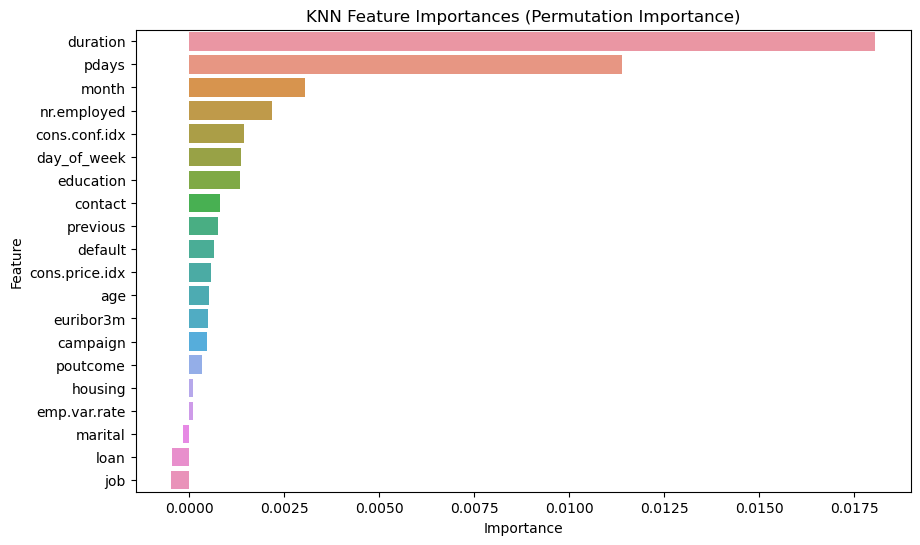

In [84]:
#Feature importance
result = permutation_importance(knn_grid.best_estimator_, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Create a DataFrame to display the feature importances along with their feature names
knn_importances_df = pd.DataFrame({
    'Feature': cols,
    'Importance': result.importances_mean,
    'Importance Std': result.importances_std
}).sort_values(by='Importance', ascending=False)

# Plotting the feature importances using matplotlib and seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=knn_importances_df)
plt.title('KNN Feature Importances (Permutation Importance)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**SVM**
- Perform SVM with different kernels

In [85]:
%%time

kernels = ['linear', 'poly', 'rbf','sigmoid']
cv_scores = []
for k in kernels:
    svc = SVC(kernel=k)
    scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

optimal_kernel = kernels[cv_scores.index(max(cv_scores))]
print("Optimal kernel :", optimal_kernel)
print("Cross-validation score :", max(cv_scores))

Optimal kernel : rbf
Cross-validation score : 0.9069839834893495
CPU times: user 1min 12s, sys: 4.13 s, total: 1min 16s
Wall time: 1min 21s


In [86]:
%%time

svm = SVC(class_weight='balanced',probability=True)
svm_params = {
    'kernel': [optimal_kernel],
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1]
}

CPU times: user 15 µs, sys: 47 µs, total: 62 µs
Wall time: 37.9 µs


In [87]:
svm_grid = GridSearchCV(svm, param_grid=svm_params, cv=5, scoring='accuracy')
svm_grid


GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', probability=True),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1],
                         'kernel': ['rbf']},
             scoring='accuracy')

- Most optiomal is rbf with CVS of 0.9069839834893495

**Decision Trees**

In [88]:
dtree = DecisionTreeClassifier()

dtree_params = {
    'max_depth': [None, 1, 11, 2],
    'min_samples_split': [2, 21, 1],
    'min_samples_leaf': [2, 21, 2],
    'criterion': ['gini', 'entropy']
}

dtree_grid = GridSearchCV(dtree, param_grid=dtree_params, cv=5, scoring='accuracy')

start_time = time.time()
dtree_grid.fit(X_train, y_train)
end_time = time.time()

In [89]:
fit_time = str(round(end_time-start_time,2))+'s'
fit_time

'10.43s'

In [90]:
dtree_execution_time = end_time - start_time
dtree_grid_best_params = dtree_grid.best_params_
dtree_grid_train_score = dtree_grid.score(X_train, y_train)
dtree_grid_test_score = dtree_grid.score(X_test, y_test)
print('dtree_grid_best_params: ', dtree_grid_best_params)
print('dtree_grid_train_score: ', round(dtree_grid_train_score,2))
print('dtree_grid_test_score: ', round(dtree_grid_test_score,2))
print('dtree_execution_time: ', round(dtree_execution_time,2), 's')

dtree_grid_best_params:  {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 21, 'min_samples_split': 21}
dtree_grid_train_score:  0.93
dtree_grid_test_score:  0.91
dtree_execution_time:  10.43 s


In [91]:
y_pred_dtree = dtree_grid.best_estimator_.predict(X_test)
dtree_precision_score = precision_score(y_test, y_pred_dtree)
dtree_recall_score = recall_score(y_test, y_pred_dtree)
dtree_f1_score = f1_score(y_test, y_pred_dtree)
y_prob_dtree = dtree_grid.best_estimator_.predict_proba(X_test)[:, 1]
auc_dtree = roc_auc_score(y_test, y_prob_dtree)
print('dtree_precision_score: ', round(dtree_precision_score,2))
print('dtree_recall_score: ', round(dtree_recall_score,2))
print('dtree_f1_score: ', round(dtree_f1_score,2))
print(classification_report(y_test, y_pred_dtree))
print("AUC = ",round(auc_dtree,2))


dtree_precision_score:  0.61
dtree_recall_score:  0.58
dtree_f1_score:  0.59
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10961
           1       0.61      0.58      0.59      1392

    accuracy                           0.91     12353
   macro avg       0.78      0.77      0.77     12353
weighted avg       0.91      0.91      0.91     12353

AUC =  0.93


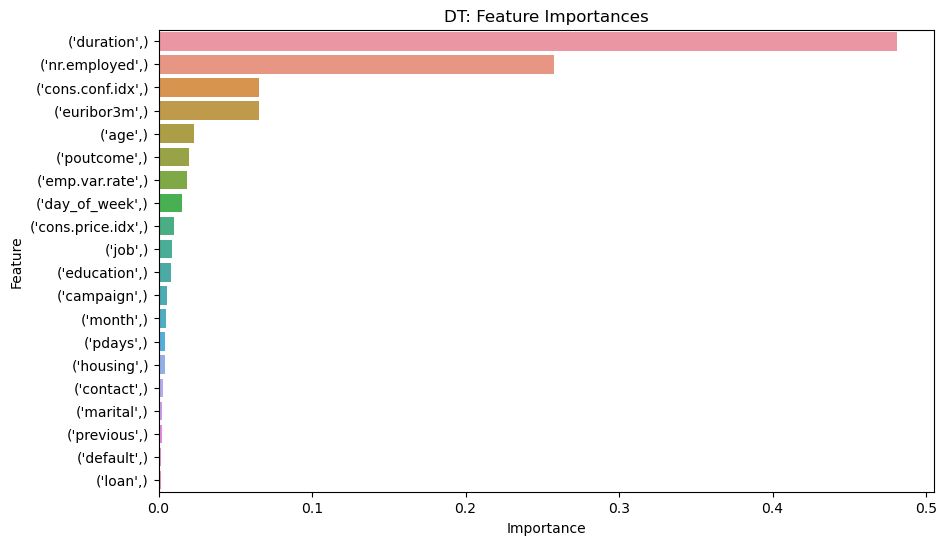

In [92]:
# Retrieve the feature importances
importances = dtree_grid.best_estimator_.feature_importances_

# Feature importances along with their feature names
importances_df_dtree = pd.DataFrame({
    'Feature': X_train.columns.tolist(),
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

#Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df_dtree)
plt.title('DT: Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**Summary**

In [93]:
results_df_improved = ''
res_dict = {
    'Model': ['Logistic Regression', 'Decision Trees', 'KNN'],
    'Train Time': [logreg_execution_time, dtree_execution_time, knn_execution_time],
    'Train Accuracy': [logreg_grid_train_score, dtree_grid_train_score, knn_grid_train_score],
    'Test Accuracy': [logreg_grid_test_score, dtree_grid_test_score, knn_grid_test_score],
    'Precision': [logreg_precision_score, dtree_precision_score, knn_precision_score],
    'Recall': [logreg_recall_score, dtree_recall_score, knn_recall_score],
    'F1': [logreg_f1_score, dtree_f1_score, knn_f1_score],
    'AUC': [auc_logreg, auc_dtree, auc_knn],
    'y_pred': [y_pred_logreg, y_pred_dtree, y_pred_knn],
    'y_prob': [y_prob_logreg, y_prob_dtree, y_prob_knn]
}
results_df_improved = pd.DataFrame(res_dict)

In [94]:
results_df_improved


,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,F1,AUC,y_pred,y_prob
0,Logistic Regression,21.494812,0.911286,0.908767,0.653179,0.405891,0.500665,0.931548,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0.02773981805235069, 0.017385631157922375, 0...."
1,Decision Trees,10.429034,0.930160,0.910305,0.607251,0.577586,0.592047,0.928294,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.010101010101010102, 0.7..."
2,KNN,71.516203,1.000000,0.903020,0.639769,0.318966,0.425695,0.903716,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.7271057819235783, ..."


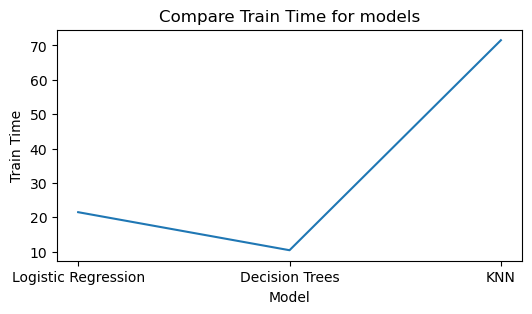

In [95]:
# Compare Train Time for models

plt.figure(figsize=(6,3))
sns.lineplot(results_df_improved, x='Model', y='Train Time')
plt.title('Compare Train Time for models')
plt.show()

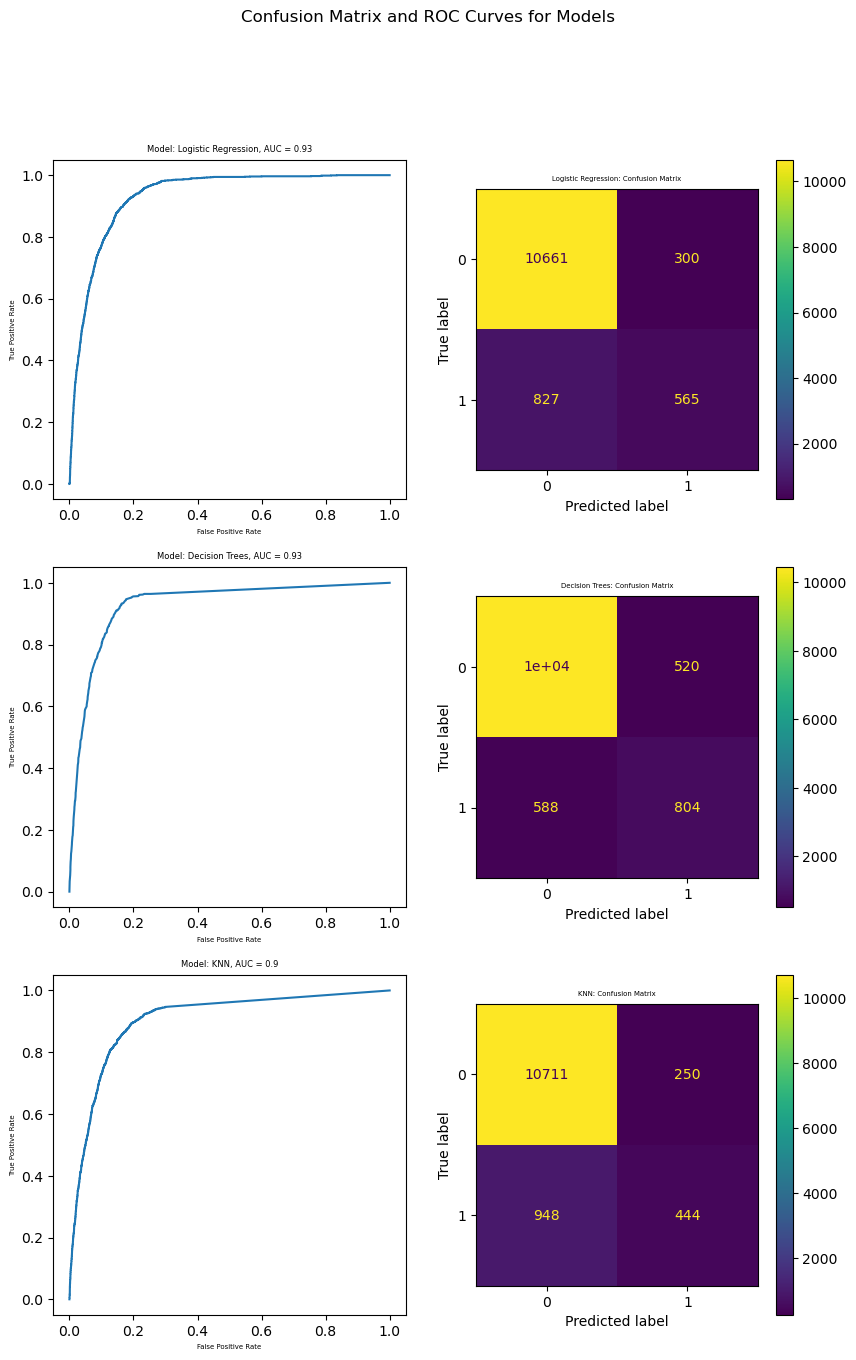

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

In [96]:
# Create a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(10,15))
# Add a title for the entire figure
fig.suptitle('Confusion Matrix and ROC Curves for Models')  

plt_count = 0

for index, row in results_df_improved.iterrows():
    plt.figure(figsize=(10,15))

    model = row['Model']
    y_prob = row['y_prob']
    ax = axes.flat[plt_count]
    
    # Visualizing ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    
    ax.plot(fpr, tpr)
    ax.set_xlabel('False Positive Rate',fontsize=5)
    ax.set_ylabel('True Positive Rate',fontsize=5)
    ax.set_title(f"Model: {model}, AUC = {round(row['AUC'],2)}",fontsize=6)
    
    plt_count += 1

    y_pred = row['y_pred']
    ax = axes.flat[plt_count] 
    # Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)
    ax.set_title(f"{model}: Confusion Matrix",fontsize=5)
    plt_count += 1

plt.tight_layout()

plt.show()


### Summary

**Logistic Regression:**
The logistic regression offeres a best AUC score of 93%. Accuracy is much lower when compred to decision tree. Training time was more than double of DT. 

**KNN:**
The KNN algorithm took longet to train. The accuracy was 90% and AUC also around 90% which is lowest comare to DT and LR. C

**SVM:**
The SVM had to be performed on a subset of 5,000 datapoint and required extremely long fit time. For a subset of 10% of the data the gridsearch and fit time took over 100 minutes. For the impracticality of such model in real time and lackluster result, I do not believe such model to be optimal.

**Decision Tree:**
The decision tree offered a very similar AUC compared to the logistic regression close to 93%. Accuracy is also very close to LR but much higher F1 score. Prcision is little lower. Overall it took the least time with highest AUC score.

**Choice of the Model:**
- Decision Tree has best Performance, AUC comparable to Logistic Regression at 0.93 and best F1 at 0.59.
- Training time is also least when compared to LR, KNN and SVM.

**Future:**
These models an be further exlplored with differnet feature selections.

- Exploring further parameters for the top two models (logistic regression and decision trees). Particularly decision tree because of least time to train with highest score.
- Include more features in the analysis, this may increase the time to train but model efficency may improve.